In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
import string
import os
import json

In [2]:
anime_recommand_raw = pd.read_csv("./data/anime_recommend.csv", index_col="anime_id")
rating_recommand_raw = pd.read_csv("./data/rating_recommend.csv")
data_anime_raw = pd.read_csv("./data/data_anime_filtered.csv", index_col="slug")

In [3]:
anime_recommand_raw['slug'] = [ name.lower().replace(" ", "-") for name in anime_recommand_raw['name'] ]

In [4]:
anime_recommand_raw

,name,genre,type,episodes,rating,members,slug
anime_id,,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,kimi-no-na-wa.
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,fullmetal-alchemist:-brotherhood
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama°
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,steins;gate
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,gintama&#039;
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,haikyuu!!:-karasuno-koukou-vs-shiratorizawa-ga...
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,hunter-x-hunter-(2011)
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,ginga-eiyuu-densetsu
15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,gintama-movie:-kanketsu-hen---yorozuya-yo-eien...


In [5]:
rating_recommand_raw.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [73]:
data_anime_raw[:100]

,Unnamed: 0,Title,Type,Episodes,Start airing,End airing,Starting season,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites
slug,,,,,,,,,,,,,,,,
fullmetal-alchemist:-brotherhood,0,Fullmetal Alchemist: Brotherhood,TV,64,2009-4-5,2010-7-4,Spring,Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387
kimi-no-na-wa.,1,Kimi no Na wa.,Movie,1,2016-8-26,2016-9-2,Fall,CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936
gintama°,2,Gintama°,TV,51,2015-4-8,2016-3-30,Spring,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597
steins;gate-0,3,Steins;Gate 0,TV,23,2018-4-12,2018-9-20,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117
steins;gate,4,Steins;Gate,TV,24,2011-4-6,2011-9-14,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365
ginga-eiyuu-densetsu,5,Ginga Eiyuu Densetsu,OVA,110,1988-1-8,1997-3-17,Movie,"Artland,Magic Bus",Novel,"Military,Sci-Fi,Space,Drama",26 min. per ep.,R,9.11,28452,121772,8370
gintama',6,Gintama',TV,51,2011-4-4,2012-3-26,Spring,Sunrise,Manga,"Action,Sci-Fi,Comedy,Historical,Parody,Samurai...",24 min. per ep.,PG-13,9.11,90758,212238,4533
hunter-x-hunter-(2011),7,Hunter x Hunter (2011),TV,148,2011-10-2,2014-9-24,Fall,Madhouse,Manga,"Action,Adventure,Super Power,Shounen",23 min. per ep.,PG-13,9.11,395162,705225,63324
3-gatsu-no-lion-2nd-season,8,3-gatsu no Lion 2nd Season,TV,22,2017-10-14,2018-3-31,Fall,Shaft,Manga,"Drama,Game,Seinen,Slice of Life",25 min. per ep.,PG-13,9.10,26284,80166,1961


## Filter the anime

In [7]:

# Select only the anime in the dataset data_anime
anime_id_selected = []

for slug in data_anime_raw.index:
    current_id = anime_recommand_raw[anime_recommand_raw['slug'] == slug].index
    if len( current_id ) > 0:
        anime_id_selected.append( current_id[0] )

In [8]:
anime_id_selected.sort()
anime_id_selected = np.array(anime_id_selected)

In [9]:
anime_id_selected.shape

(1296,)

In [10]:
anime_id_selected

array([    1,     5,     6, ..., 34349, 34445, 34514], dtype=int64)

## Get the rating of the selected animes from the first 5000 users

In [11]:
file_exists = os.path.exists("./data/rating_table.csv")
if not file_exists:
    rating_table = np.full( (5000, len(anime_id_selected)), -1 )
    for index, row in rating_recommand_raw.iterrows():
        if row['user_id'] >= 5000:
            break
        if row['anime_id'] in anime_id_selected:
            rating_table[ row['user_id'] - 1 , np.where( anime_id_selected == row['anime_id'] )[0] ] = row['rating']
    pd.DataFrame(rating_table, columns = list(anime_id_selected) ).to_csv("./data/rating_table.csv")

In [12]:
rating_table_df = pd.read_csv("./data/rating_table.csv", index_col = 0)

In [14]:
rating_table_df

,1,5,6,15,16,17,18,20,24,28,...,33988,34076,34103,34136,34240,34284,34299,34349,34445,34514
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,8,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,8,6,-1,6,6,6,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## Dimension Reduction

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=120)

In [17]:
rating_table = np.array( rating_table_df )

In [18]:
pca.fit(rating_table)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.explained_variance_[:] 

array([472.57926791, 102.3343097 ,  83.45457951,  74.82111033,
        70.20731454,  51.56638662,  39.73408294,  37.88845954,
        35.17801951,  30.79977263,  29.96193493,  26.16825841,
        24.34749384,  23.89633435,  21.85231276,  21.28260237,
        20.20992892,  19.66527657,  18.85102323,  18.1512688 ,
        17.64740148,  17.47558283,  17.06037906,  16.33014319,
        16.2802512 ,  15.6095039 ,  15.29735048,  15.10699191,
        14.97821459,  14.72449712,  14.47305828,  14.10783705,
        14.02218598,  13.792135  ,  13.60285256,  13.44327762,
        13.27716201,  12.95337306,  12.86840146,  12.74513035,
        12.19549701,  12.12865153,  12.04566484,  11.90687789,
        11.72534682,  11.54869509,  11.5180123 ,  11.43118189,
        11.06744538,  11.01512306,  10.98870021,  10.81190546,
        10.78210244,  10.54156594,  10.52564514,  10.36934539,
        10.21366229,  10.0960068 ,   9.97812098,   9.92847767,
         9.80191197,   9.76187466,   9.63586334,   9.57

In [21]:
from sklearn.decomposition import PCA as pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
# model = pca(n_components=2)

# Fit transform
results = model.fit_transform(rating_table)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

AttributeError: 'PCA' object has no attribute 'plot'

## Get the average Score of  each genre from each user

In [11]:
genres = set({})

for index, anime in data_anime_raw.iterrows():
    for genre in anime['Genres'].split(','):
        if genre not in genres:
            genres.add(genre)

genres = list(genres)

In [12]:
genres

['Space',
 'Shoujo Ai',
 'Kids',
 'Game',
 'Mystery',
 'Fantasy',
 'Military',
 'Sports',
 'Martial Arts',
 'Super Power',
 'Historical',
 'Shounen',
 'Drama',
 'Action',
 'Seinen',
 'Demons',
 'Samurai',
 'Sci-Fi',
 'Adventure',
 'Harem',
 'Comedy',
 'Parody',
 'Josei',
 'Magic',
 'Psychological',
 'Cars',
 'Music',
 'Mecha',
 'Romance',
 'Horror',
 'Police',
 'Dementia',
 'Slice of Life',
 '\xa0Adventure',
 'Vampire',
 'Thriller',
 'Supernatural',
 'Shoujo',
 'School',
 'Shounen Ai']

In [21]:
genres_count = {}

for index, anime in data_anime_raw.iterrows():
    for genre in anime['Genres'].split(','):
        if genre not in genres_count:
            genres_count[genre] = 1
        else:
            genres_count[genre] += 1

In [22]:
genres_count

{'Action': 546,
 'Military': 119,
 'Adventure': 339,
 'Comedy': 731,
 'Drama': 498,
 'Magic': 143,
 'Fantasy': 336,
 'Shounen': 425,
 'Supernatural': 296,
 'Romance': 337,
 'School': 289,
 'Historical': 146,
 'Parody': 74,
 'Samurai': 37,
 'Sci-Fi': 280,
 'Thriller': 43,
 'Space': 70,
 'Super Power': 124,
 'Game': 32,
 'Seinen': 146,
 'Slice of Life': 310,
 'Mystery': 202,
 'Vampire': 24,
 'Sports': 124,
 'Mecha': 115,
 'Music': 65,
 'Josei': 30,
 'Martial Arts': 41,
 'Shoujo': 128,
 'Police': 56,
 'Psychological': 88,
 'Kids': 28,
 '\xa0Adventure': 1,
 'Demons': 65,
 'Horror': 36,
 'Shounen Ai': 19,
 'Harem': 16,
 'Cars': 14,
 'Dementia': 7,
 'Shoujo Ai': 13}

In [23]:
genres = [ k for (k, v) in genres_count.items() if v > 100 ]

In [24]:
average_rating_by_genre = np.full( (10000, len(genres)), 0 )
count_by_genre = np.ones( (10000, len(genres)) )

In [25]:
average_rating_by_genre

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
count_by_genre

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [27]:
for index, row in rating_recommand_raw.iterrows():
    if row['user_id'] >= 10000:
        break
    if row['anime_id'] in anime_id_selected and row['rating']> 0:
        slug = anime_recommand_raw.loc[ row['anime_id'] ]['slug']
        
        current_genres = data_anime_raw.loc[slug]['Genres']
        if isinstance (current_genres, str):
            current_genres = current_genres.split(",")
        else:
            print(current_genres)
            current_genres = current_genres[0].split(",")
        for g in current_genres:
            if g in genres:
                count_by_genre[ row['user_id'] , genres.index(g) ] += 1
                average_rating_by_genre[ row['user_id'] , genres.index(g) ] += row['rating']

In [31]:
average_rating_by_genre = average_rating_by_genre / count_by_genre

In [32]:
average_rating_by_genre

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [5.        , 0.        , 5.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [8.16666667, 6.33333333, 6.66666667, ..., 0.        , 6.33333333,
        5.        ],
       [7.125     , 5.66666667, 6.57142857, ..., 0.        , 0.        ,
        0.        ],
       [8.        , 0.        , 5.66666667, ..., 0.        , 0.        ,
        6.5       ]])

In [33]:
genres

['Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Supernatural',
 'Romance',
 'School',
 'Historical',
 'Sci-Fi',
 'Super Power',
 'Seinen',
 'Slice of Life',
 'Mystery',
 'Sports',
 'Mecha',
 'Shoujo']

In [34]:
pd.DataFrame(average_rating_by_genre, columns = genres ).to_csv("./data/average_score_by_genre_from_users.csv")

In [35]:
pd.DataFrame(average_rating_by_genre, columns = genres )

,Action,Military,Adventure,Comedy,Drama,Magic,Fantasy,Shounen,Supernatural,Romance,School,Historical,Sci-Fi,Super Power,Seinen,Slice of Life,Mystery,Sports,Mecha,Shoujo
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
3,7.696970,6.857143,7.863636,8.095238,7.526316,7.545455,8.000000,8.185185,7.470588,7.000000,8.000000,3.500000,6.000000,7.200000,6.000000,6.600000,7.222222,8.125000,3.500000,3.500000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.779412,2.333333,6.156863,5.270073,5.884615,4.833333,5.525000,5.611765,5.080000,3.814815,4.350877,5.666667,6.111111,4.857143,6.238095,5.108696,3.923077,6.583333,2.333333,2.666667
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.905660,6.666667,7.674419,7.671429,7.861111,7.709677,7.648649,7.685714,7.777778,7.585366,7.466667,6.400000,7.884615,7.818182,7.266667,7.200000,7.857143,5.666667,7.777778,7.000000
8,7.833333,0.000000,7.000000,7.000000,7.000000,5.000000,7.000000,6.333333,6.000000,7.400000,6.000000,0.000000,5.000000,6.333333,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000


## Get the Number of Fans of each Genre

In [37]:
fans_by_genre = np.zeros( (len(genres), len(genres)) )
haters_by_genre = np.zeros( (len(genres), len(genres)) )

In [36]:
average_rating_by_genre.shape

(10000, 20)

if the user's average rating over one genre is bigger than 8, we consider he is a fan of this genre

in `fans_by_genre`, `[i, i]` stores the number of fans of `i`th genre and `[i, j]` is the number of co-fan of genre `i` and `j`, the number of fans of the two in same time

In [38]:
for index, rating in enumerate(average_rating_by_genre):
    for i in range(len(rating)):
        if rating[i] >= 8.5:
            fans_by_genre[i, i] += 1
        for j in range(i+1, len(rating)):
            if rating[i] >= 8.5 and rating[j] >= 8.5:
                fans_by_genre[i, j] += 1
                fans_by_genre[j, i] += 1
        if 0.01 < rating[i] < 5:
            haters_by_genre[i, i] += 1
        for j in range(i+1, len(rating)):
            if 0.01 < rating[i] < 5 and 0.01 < rating[j] < 5:
                haters_by_genre[i, j] += 1
                haters_by_genre[j, i] += 1

In [39]:
fans_by_genre

array([[1152.,  171.,  545.,  755.,  745.,  197.,  563.,  645.,  618.,
         529.,  405.,  113.,  432.,  288.,   99.,  296.,  308.,   70.,
         121.,  110.],
       [ 171.,  192.,  120.,  129.,  170.,   63.,  127.,  131.,  123.,
         118.,   93.,   52.,  140.,   79.,   53.,   72.,   88.,   19.,
          93.,   28.],
       [ 545.,  120.,  707.,  529.,  506.,  158.,  474.,  477.,  394.,
         375.,  264.,  112.,  275.,  226.,   78.,  205.,  223.,   45.,
          91.,   94.],
       [ 755.,  129.,  529., 1168.,  770.,  181.,  539.,  661.,  581.,
         621.,  516.,  110.,  366.,  261.,   93.,  385.,  283.,   87.,
         100.,  134.],
       [ 745.,  170.,  506.,  770., 1177.,  199.,  540.,  540.,  607.,
         647.,  455.,  122.,  424.,  232.,  104.,  382.,  321.,   86.,
         127.,  136.],
       [ 197.,   63.,  158.,  181.,  199.,  226.,  198.,  157.,  185.,
         182.,  136.,   58.,  132.,  100.,   48.,  101.,  108.,   20.,
          45.,   70.],
       [ 5

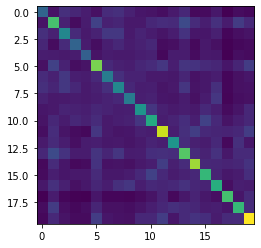

In [43]:
from matplotlib import pyplot as plt

plt.imshow(haters_by_genre)

In [41]:
pd.DataFrame(fans_by_genre, columns = genres ).to_csv("./data/fans_by_genre.csv")

In [42]:
haters_by_genre

array([[ 444.,   86.,  194.,  160.,  125.,   77.,  179.,  194.,  140.,
          96.,   87.,   65.,  114.,  164.,   52.,   57.,  102.,   18.,
          64.,   48.],
       [  86.,  954.,  137.,   63.,  121.,  275.,  139.,  153.,  106.,
         108.,  165.,  185.,  176.,  315.,  182.,  127.,  200.,  117.,
         247.,  169.],
       [ 194.,  137.,  627.,  176.,  111.,  144.,  233.,  234.,  115.,
         148.,  119.,   95.,  123.,  212.,   98.,  100.,  133.,   39.,
          74.,   87.],
       [ 160.,   63.,  176.,  437.,  120.,   68.,  129.,  163.,  116.,
         140.,  164.,   60.,   72.,  119.,   50.,  108.,   79.,   25.,
          47.,   58.],
       [ 125.,  121.,  111.,  120.,  419.,   87.,  121.,  111.,  113.,
         129.,  139.,   44.,  119.,  116.,   61.,  108.,  104.,   21.,
          65.,   59.],
       [  77.,  275.,  144.,   68.,   87., 1070.,  171.,  135.,  122.,
         159.,  180.,  229.,  131.,  215.,  213.,  174.,  159.,   97.,
         157.,  251.],
       [ 1

In [53]:
pd.DataFrame(haters_by_genre, columns = genres ).to_csv("./data/haters_by_genre.csv")

## Form the nodes and links

In [44]:
genres_node = [
    {
        "id": g,
        "fans_number": fans_by_genre[genres.index(g)][genres.index(g)] 
    } for g in genres
]

In [45]:
genres_node

[{'id': 'Action', 'fans_number': 1152.0},
 {'id': 'Military', 'fans_number': 192.0},
 {'id': 'Adventure', 'fans_number': 707.0},
 {'id': 'Comedy', 'fans_number': 1168.0},
 {'id': 'Drama', 'fans_number': 1177.0},
 {'id': 'Magic', 'fans_number': 226.0},
 {'id': 'Fantasy', 'fans_number': 689.0},
 {'id': 'Shounen', 'fans_number': 827.0},
 {'id': 'Supernatural', 'fans_number': 809.0},
 {'id': 'Romance', 'fans_number': 787.0},
 {'id': 'School', 'fans_number': 590.0},
 {'id': 'Historical', 'fans_number': 145.0},
 {'id': 'Sci-Fi', 'fans_number': 527.0},
 {'id': 'Super Power', 'fans_number': 314.0},
 {'id': 'Seinen', 'fans_number': 116.0},
 {'id': 'Slice of Life', 'fans_number': 486.0},
 {'id': 'Mystery', 'fans_number': 428.0},
 {'id': 'Sports', 'fans_number': 108.0},
 {'id': 'Mecha', 'fans_number': 149.0},
 {'id': 'Shoujo', 'fans_number': 157.0}]

(array([192.,  77.,  43.,  37.,  25.,  14.,   9.,   0.,   0.,   3.]),
 array([  13. ,  129.4,  245.8,  362.2,  478.6,  595. ,  711.4,  827.8,
         944.2, 1060.6, 1177. ]),
 <a list of 10 Patch objects>)

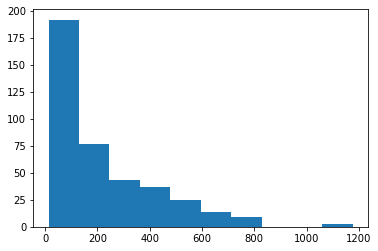

In [68]:
plt.hist(fans_by_genre.reshape(-1))

In [62]:
with open("./data/genres_node.json", "w") as write_file:
    json.dump(genres_node, write_file)

In [69]:
genres_link = []

In [70]:
for i in range(len(fans_by_genre)):
    for j in range(i+1, len(fans_by_genre)):
        if fans_by_genre[i][j] >= 100:
            genres_link.append({
                "source": genres[i],
                "count" : fans_by_genre[i][j],
                "value" : 2000 / fans_by_genre[i][j],
                "target": genres[j]
            })

In [71]:
genres_link

[{'source': 'Action',
  'count': 171.0,
  'value': 11.695906432748538,
  'target': 'Military'},
 {'source': 'Action',
  'count': 545.0,
  'value': 3.669724770642202,
  'target': 'Adventure'},
 {'source': 'Action',
  'count': 755.0,
  'value': 2.6490066225165565,
  'target': 'Comedy'},
 {'source': 'Action',
  'count': 745.0,
  'value': 2.684563758389262,
  'target': 'Drama'},
 {'source': 'Action',
  'count': 197.0,
  'value': 10.152284263959391,
  'target': 'Magic'},
 {'source': 'Action',
  'count': 563.0,
  'value': 3.552397868561279,
  'target': 'Fantasy'},
 {'source': 'Action',
  'count': 645.0,
  'value': 3.10077519379845,
  'target': 'Shounen'},
 {'source': 'Action',
  'count': 618.0,
  'value': 3.236245954692557,
  'target': 'Supernatural'},
 {'source': 'Action',
  'count': 529.0,
  'value': 3.780718336483932,
  'target': 'Romance'},
 {'source': 'Action',
  'count': 405.0,
  'value': 4.938271604938271,
  'target': 'School'},
 {'source': 'Action',
  'count': 113.0,
  'value': 17.69

In [72]:
with open("./data/genres_link.json", "w") as write_file:
    json.dump(genres_link, write_file)

## K means cluster 

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(average_rating_by_genre)

In [123]:
kmeans.inertia_ / 5000

122.90497610974045

In [126]:
inertias = np.zeros(30)
for k in range(1,31):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(average_rating_by_genre)
    inertias[k-1] = kmeans.inertia_ / 5000

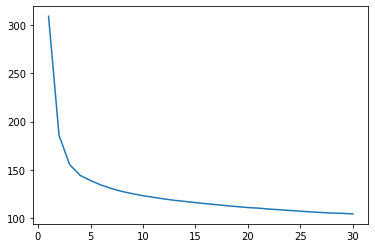

In [127]:
pl.plot(range(1,31), inertias)

In [53]:
from collections import Counter 
Counter( kmeans.predict(rating_table) )

Counter({29: 1915,
         7: 199,
         17: 91,
         19: 133,
         11: 261,
         10: 585,
         13: 395,
         16: 24,
         2: 205,
         5: 56,
         18: 209,
         22: 12,
         20: 55,
         1: 188,
         26: 209,
         25: 102,
         21: 25,
         9: 99,
         6: 2,
         0: 40,
         8: 40,
         14: 54,
         15: 3,
         24: 34,
         12: 52,
         3: 6,
         4: 1,
         23: 2,
         28: 1,
         27: 2})

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(rating_table)

In [40]:
Counter( kmeans.predict(rating_table) )

Counter({2: 2216, 3: 1605, 1: 854, 0: 325})

In [155]:
# def nmf(X, k):
#     """
#     Args:
#         X (np.array, dim: n,m,4): containing the image channel to be processed
#         k (int): the number of elements to be used in the low rank approximation 
    
#     Returns:
#         X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
#     """
    
# #     X_low_rank_approx = np.zeros(X.shape)
# #     for i in range(4):
#     A_0, D, B_0 = np.linalg.svd(X, full_matrices=False)
#     A = np.abs(A_0[:,:k])
#     B = np.abs(B_0[:k,:])

#     for _ in range(65):
#         B = np.nan_to_num(B * (A.T.dot(X))/(A.T.dot(A.dot(B))))
#         A = np.nan_to_num(A * (X.dot(B.T)) / (A.dot(B.dot(B.T))))
#     return A, B